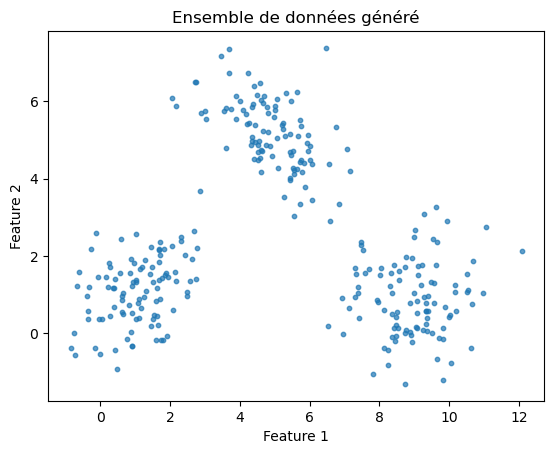

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(42)

# Nombre de points de données dans chaque cluster
num_samples_per_cluster = 100

# Générer des données pour le premier cluster
cluster1_mean = np.array([1, 1])
cluster1_covariance = np.array([[1, 0.5], [0.5, 1]])
cluster1_data = np.random.multivariate_normal(cluster1_mean, cluster1_covariance, num_samples_per_cluster)

# Générer des données pour le deuxième cluster
cluster2_mean = np.array([5, 5])
cluster2_covariance = np.array([[1, -0.5], [-0.5, 1]])
cluster2_data = np.random.multivariate_normal(cluster2_mean, cluster2_covariance, num_samples_per_cluster)

# Générer des données pour le troisième cluster
cluster3_mean = np.array([9, 1])
cluster3_covariance = np.array([[1, 0], [0, 1]])
cluster3_data = np.random.multivariate_normal(cluster3_mean, cluster3_covariance, num_samples_per_cluster)

# Concaténer les données de tous les clusters
data = np.concatenate([cluster1_data, cluster2_data, cluster3_data])

# Mélanger les données
np.random.shuffle(data)

# Afficher les données générées
plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.7)
plt.title("Ensemble de données généré")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
from scipy.stats import multivariate_normal

def initialize_parameters(data, num_clusters):
    """
    Initialise les paramètres du modèle GMM.
    """
    num_samples, num_features = data.shape

    # Initialisation aléatoire des moyennes et covariances
    means = data[np.random.choice(num_samples, num_clusters, replace=False)]
    covariances = [np.cov(data.T) for _ in range(num_clusters)]

    # Initialisation égale des poids des composants
    weights = np.ones(num_clusters) / num_clusters

    return means, covariances, weights

def expectation(data, means, covariances, weights):
    """
    Étape d'expectation (E-step) de l'algorithme EM.
    """
    num_clusters = len(means)
    num_samples = len(data)

    # Calcul des probabilités conditionnelles P(cluster | data_point)
    probabilities = np.zeros((num_samples, num_clusters))

    for k in range(num_clusters):
        probabilities[:, k] = weights[k] * multivariate_normal.pdf(data, means[k], covariances[k])

    # Normalisation des probabilités
    normalization_factor = np.sum(probabilities, axis=1, keepdims=True)
    probabilities /= normalization_factor

    return probabilities

def maximization(data, probabilities):
    """
    Étape de maximisation (M-step) de l'algorithme EM.
    """
    num_clusters = probabilities.shape[1]
    num_samples, num_features = data.shape

    # Mise à jour des moyennes
    means = np.dot(probabilities.T, data) / np.sum(probabilities, axis=0, keepdims=True).T

    # Mise à jour des covariances
    covariances = [np.dot(probabilities[:, k] * (data - means[k]).T, (data - means[k])) / np.sum(probabilities[:, k])
                   for k in range(num_clusters)]

    # Mise à jour des poids
    weights = np.sum(probabilities, axis=0) / num_samples

    return means, np.array(covariances), weights

def gmm_em(data, num_clusters, num_iterations=100, tol=1e-4):
    """
    Implémentation de l'algorithme EM pour un modèle GMM.
    """
    means, covariances, weights = initialize_parameters(data, num_clusters)

    for iteration in range(num_iterations):
        # Étape d'expectation
        probabilities = expectation(data, means, covariances, weights)

        # Étape de maximisation
        new_means, new_covariances, new_weights = maximization(data, probabilities)

        # Critère d'arrêt : tolérance
        if np.max(np.abs(new_means - means)) < tol and np.max(np.abs(new_covariances - covariances)) < tol and np.max(np.abs(new_weights - weights)) < tol:
            break

        # Mise à jour des paramètres
        means, covariances, weights = new_means, new_covariances, new_weights

    return means, covariances, weights

# Exemple d'utilisation
# Remplacez les données par votre propre ensemble de données
# data = ...

# Nombre de clusters
num_clusters = 3

# Nombre d'itérations
num_iterations = 100

# Tolérance
tolerance = 1e-4

# Appliquer l'algorithme EM
means, covariances, weights = gmm_em(data, num_clusters, num_iterations, tolerance)

# Afficher les résultats
print("Moyennes finales:")
print(means)
print("\nCovariances finales:")
print(covariances)
print("\nPoids finaux:")
print(weights)

Moyennes finales:
[[8.93764721 0.88242249]
 [1.0816737  1.1150619 ]
 [4.88698118 5.16456081]]

Covariances finales:
[[[ 1.06107874  0.06702592]
  [ 0.06702592  0.92382797]]

 [[ 0.81331582  0.29419464]
  [ 0.29419464  0.76311934]]

 [[ 1.05132759 -0.51294528]
  [-0.51294528  0.8458521 ]]]

Poids finaux:
[0.33657421 0.33306836 0.33035743]


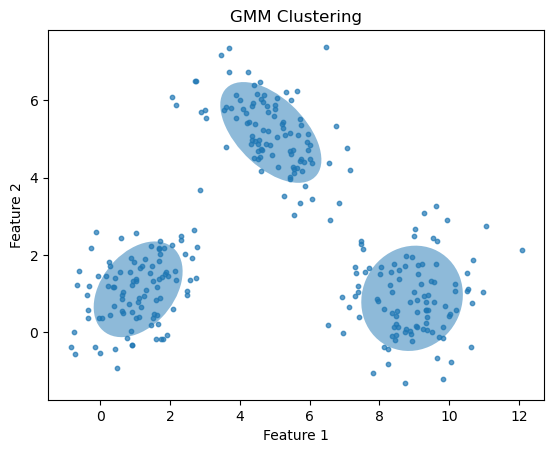

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_gmm_result(data, means, covariances, weights):
    """
    Affiche les données avec les ellipses représentant les covariances des clusters.
    """
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.7)

    for i in range(len(means)):
        mean = means[i]
        cov = covariances[i]
        weight = weights[i]

        # Calculer les vecteurs propres et les valeurs propres de la covariance
        eigvals, eigvecs = np.linalg.eigh(cov)
        eigvals = 2.0 * np.sqrt(2.0) * np.sqrt(eigvals)

        # Obtenir l'angle de rotation
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])

        # Dessiner l'ellipse
        ellipse = Ellipse(mean, eigvals[0], eigvals[1], angle=np.degrees(angle), alpha=0.5)
        plt.gca().add_patch(ellipse)

    plt.title("GMM Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Utiliser les moyennes, covariances et poids finaux obtenus après l'exécution de l'algorithme EM
# means, covariances, weights = ...

# Afficher les résultats avec les ellipses
plot_gmm_result(data, means, covariances, weights)

In [24]:
import numpy as np
from scipy.special import digamma
from scipy.optimize import minimize

def initialize_parameters(k, d):
    pi = np.random.dirichlet(np.ones(k))
    W = np.random.dirichlet(np.ones(d), size=k)
    return pi, W

def e_step(X, pi, W):
    m = len(X)
    k, d = W.shape
    responsibilities = np.zeros((m, k))

    for l in range(m):
        for i in range(k):
            responsibilities[l, i] = np.log(pi[i]) + np.sum(np.log(W[i, X[l]]))

        responsibilities[l, :] -= np.max(responsibilities[l, :])  # for numerical stability
        responsibilities[l, :] = np.exp(responsibilities[l, :])
        responsibilities[l, :] /= np.sum(responsibilities[l, :])

    return responsibilities

def m_step(X, responsibilities):
    m, d = len(X), len(X[0])
    k = len(responsibilities[0])

    pi = np.mean(responsibilities, axis=0)

    W = np.zeros((k, d))

    for i in range(k):
        for j in range(d):
            W[i, j] = np.sum(responsibilities[l, i] * np.sum(X[l] == j) for l in range(m))

        W[i, :] /= np.sum(responsibilities[:, i])

    return pi, W

def compute_lower_bound(X, pi, W, responsibilities):
    m = len(X)
    k, d = W.shape

    lower_bound = 0

    for l in range(m):
        for i in range(k):
            lower_bound += responsibilities[l, i] * np.log(pi[i])

            for j in range(d):
                lower_bound += responsibilities[l, i] * X[l].count(j) * np.log(W[i, j])

    return lower_bound

def em_topic_model(X, k, d, pi=None, W=None, tol=1e-5, maxit=100):
    m = len(X)

    if pi is None or W is None:
        pi, W = initialize_parameters(k, d)

    for iteration in range(maxit):
        responsibilities = e_step(X, pi, W)
        pi_new, W_new = m_step(X, responsibilities)

        lower_bound = compute_lower_bound(X, pi_new, W_new, responsibilities)

        if np.abs(lower_bound - compute_lower_bound(X, pi, W, responsibilities)) < tol:
            break

        pi, W = pi_new, W_new

    return pi, W, responsibilities

In [25]:
from scipy.stats import dirichlet, poisson

def generate_data(m, d, k, lambda_val):
    # Générer les paramètres réels
    true_pi = dirichlet.rvs([1] * k).flatten()
    true_W = dirichlet.rvs(np.ones(d), size=k)

    # Générer m documents
    documents = []
    print(true_pi)
    for _ in range(m):
        num_words = poisson.rvs(lambda_val)
        document = np.random.choice(k, size=num_words, p=true_pi)
        documents.append(document)

    return true_pi, true_W, documents

def plot_parameters(true_params, estimated_params, param_names):
    k = len(true_params)
    indices = np.arange(k)
    width = 0.35

    fig, ax = plt.subplots()
    true_bars = ax.bar(indices - width/2, true_params, width, label='True')
    estimated_bars = ax.bar(indices + width/2, estimated_params, width, label='Estimated')

    ax.set_ylabel('Values')
    ax.set_title('True vs Estimated Parameters')
    ax.set_xticks(indices)
    ax.set_xticklabels(param_names)
    ax.legend()

    plt.show()

# Paramètres
k = 2
d = 10
m = 100

# Simulation avec lambda = 100
lambda_val = 100
true_pi, true_W, documents = generate_data(m, d, k, lambda_val)

# Appliquer l'algorithme EM
estimated_pi, estimated_W, _ = em_topic_model(documents, k, d)

# Afficher les résultats
plot_parameters(true_pi, estimated_pi, ['pi_1', 'pi_2'])
plot_parameters(true_W.flatten(), estimated_W.flatten(), ['w_{}{}'.format(i, j) for i in range(k) for j in range(d)])

# Répéter la simulation avec différentes valeurs de lambda
lambda_values = [5, 10, 20, 30, 50, 100]

for lambda_val in lambda_values:
    true_pi, true_W, documents = generate_data(m, d, k, lambda_val)
    estimated_pi, estimated_W, _ = em_topic_model(documents, k, d)

    print(f"\nSimulation with lambda = {lambda_val}")
    print("True pi:", true_pi)
    print("Estimated pi:", estimated_pi)
    print("True W:\n", true_W)
    print("Estimated W:\n", estimated_W)

[0.26003551 0.73996449]


C:\Users\Moadh\AppData\Local\Temp\ipykernel_5728\2085245427.py:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  W[i, j] = np.sum(responsibilities[l, i] * np.sum(X[l] == j) for l in range(m))


AttributeError: 'numpy.ndarray' object has no attribute 'count'